In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pathlib
from behavioral_analysis.math_tools.vector_funcs import calculate_speed_1d
from behavioral_analysis.pandas_tools.files import build_file_df
from behavioral_analysis.utility.builtin_classes.objects import save_object
from behavioral_analysis.visualization.plots import plot_arena, load_arena_from_json
from tqdm.cli import tqdm

e:\Users\marti\miniconda3\envs\manuscript2021\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
root_dir = pathlib.Path(r"D:\Folder With Backup\2019_paper\data")
data_out_dir = root_dir / "data_output"
processed_track_dir = data_out_dir / "processed_tracks"

annotations_dir = root_dir / "annotations"
tracking_dir = root_dir / "tracking"

videos_dir = root_dir / "videos_remuxed"


In [35]:
old_source_mouse_dict = {
    "Janvier": ["3_1", "3_2", "3_3", "3_4"],
    "Charles River": ["2_1", "2_2", "2_3", "2_4"],
    "Internal": ["1_1", "1_2", "1_3", "1_4"]
}

new_source_mouse_dict = {
    "Janvier": ["1_1", "1_4", "1_7", "1_10", "3_3", "3_6", "3_9", "3_12"],
    "Charles River": ["1_3", "1_6", "1_9", "1_12", "3_2", "3_5", "3_8", "3_11"],
    "Internal": ["1_2", "1_5", "1_8", "1_11", "3_1", "3_4", "3_7", "3_10"],
}

import pandas as pd

old_deanonymization_dict = {anonymous_id: (f"C1{source_string[0]}{i+1}", source_string) for source_string, anonymous_id_list in old_source_mouse_dict.items() for i, anonymous_id in enumerate(anonymous_id_list)}
new_deanonymization_dict = {anonymous_id: (f"C2{source_string[0]}{i+1}", source_string) for source_string, anonymous_id_list in new_source_mouse_dict.items() for i, anonymous_id in enumerate(anonymous_id_list)}
full_deanonymization_df = pd.concat({1: pd.Series(old_deanonymization_dict), 2: pd.Series(new_deanonymization_dict)}, axis=0, names=["cohort_id", "mouse_id"]).apply(lambda x: pd.Series(x, index=["short_name", "source"]))

def unblind_mouse_id(cohort_id, anonymous_mouse_id):
    return full_deanonymization_df.loc[(cohort_id, anonymous_mouse_id), "short_name"]

unblind_mouse_id(2, "3_1")

'C2I5'

# Figure 5 (Looming stimulus)

In [22]:
local_annotations_dir = annotations_dir / "looming_stimulus" / "cohort1"
arena_dict_path = local_annotations_dir / "arena_dict.json"
expanded_arena_transforms_path = local_annotations_dir / "expanded_arena_transforms.csv"
local_processed_track_dir = processed_track_dir / "looming_stimulus"
local_data_out_dir = data_out_dir / "looming_stimulus"
local_data_out_dir.mkdir(parents=True, exist_ok=True)

100%|██████████| 497/497 [00:00<00:00, 517.82it/s]


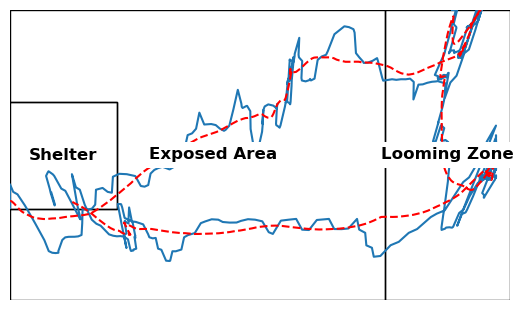

x           y  clipped_x  \
cohort_id mouse_id loom_id frame_index                                     
1         1_1      0       0            84.730453   40.909605  84.730453   
                           1            85.386111   43.126616  85.386111   
                           2            85.399098   43.221129  85.399098   
                           3            91.033695   59.373013  91.033695   
                           4            91.495796   60.452278  91.495796   
...                                           ...         ...        ...   
2         3_9      13      894          52.460809  158.805371  52.460809   
                           895          52.297458  158.022128  52.297458   
                           896          52.233742  158.090282  52.233742   
                           897          52.371962  158.135770  52.371962   
                           898          52.533004  158.869841  52.533004   

                                         clipped_y containing_polygon  \
cohort_id mouse_id loom_id frame_index                                  
1         1_1      0       0             40.909605       Exposed Area   
                           1             43.126616       Exposed Area   
                           2             43.221129       Exposed Area   
                           3             59.373013       Exposed Area   
                           4             60.452278       Exposed Area   
...                                            ...                ...   
2         3_9      13      894          158.805371            Shelter   
                           895          158.022128            Shelter   
                           896          158.090282            Shelter   
                           897          158.135770            Shelter   
                           898          158.869841            Shelter   

                                        interpolated_x  interpolated_y  \
cohort_id mouse_id loom_id frame_index                                   
1         1_1      0       0                 84.730453       40.909605   
                           1                 85.386111       43.126616   
                           2                 85.399098       43.221129   
                           3                 91.033695       59.373013   
                           4                 91.495796       60.452278   
...                                                ...             ...   
2         3_9      13      894               52.460809      158.805371   
                           895               52.297458      158.022128   
                           896               52.233742      158.090282   
                           897               52.371962      158.135770   
                           898               52.533004      158.869841   

                                        smoothed_x  smoothed_y loom_phase  \
cohort_id mouse_id loom_id frame_index                                      
1         1_1      0       0                   NaN         NaN        pre   
                           1                   NaN         NaN        pre   
                           2                   NaN         NaN        pre   
                           3                   NaN         NaN        pre   
                           4                   NaN         NaN        pre   
...                                            ...         ...        ...   
2         3_9      13      894                 NaN         NaN       post   
                           895                 NaN         NaN       post   
                           896                 NaN         NaN       post   
                           897                 NaN         NaN       post   
                           898                 NaN         NaN       post   

                                        shelter_relative_x  \
cohort_id mouse_id loom_id frame_index                       
1         1_1      0

In [ ]:
arena_dict = load_arena_from_json(arena_dict_path)

processed_track_files = build_file_df(local_processed_track_dir, r"cohort(?P<cohort_id>\d+)\\(?P<date_string>\d+)_mouse(?P<mouse_id>\S+)_loom(?P<loom_id>\d+)_processed\.csv")
processed_track_files = processed_track_files.astype(dict(cohort_id=int, loom_id=int)).sort_values(["mouse_id", "loom_id"], ascending=True)
processed_track_files = processed_track_files[processed_track_files["loom_id"].lt(14)]

full_track_dict = {}

for idx, row in tqdm(processed_track_files.iterrows(), total=len(processed_track_files)):
    track_df = pd.read_csv(row["file_path"], index_col=0)
    track_df = track_df.reindex(pd.RangeIndex(start=0, stop=track_df.index.max()+1, name="frame_index"))
    full_track_dict[(row["cohort_id"], row["mouse_id"], row["loom_id"])] = track_df

full_track_df = pd.concat(full_track_dict, names=["cohort_id", "mouse_id", "loom_id", "frame_index"]).sort_index()

full_track_df["interpolated_x"] = full_track_df.groupby(["cohort_id", "mouse_id", "loom_id"])["clipped_x"].apply(lambda x: x.interpolate(method="linear", limit_area="inside").droplevel([0, 1, 2]))
full_track_df["interpolated_y"] = full_track_df.groupby(["cohort_id", "mouse_id", "loom_id"])["clipped_y"].apply(lambda x: x.interpolate(method="linear", limit_area="inside").droplevel([0, 1, 2]))
full_track_df["smoothed_x"] = full_track_df.groupby(["cohort_id", "mouse_id", "loom_id"])["interpolated_x"].rolling(window=31, center=True).mean().droplevel([0, 1, 2])
full_track_df["smoothed_y"] = full_track_df.groupby(["cohort_id", "mouse_id", "loom_id"])["interpolated_y"].rolling(window=31, center=True).mean().droplevel([0, 1, 2])

ax = plot_arena(arena_dict)
example_track = full_track_df.loc[(2, "1_1", 0)]
ax.plot(example_track["clipped_x"], example_track["clipped_y"])
ax.plot(example_track["smoothed_x"], example_track["smoothed_y"], color="red", ls="--")
plt.show()

start_loom = 5 * 60
start_post = 10 * 60
shelter_right_edge = arena_dict["Shelter"].bounds[2]

full_track_df["loom_phase"] = "pre"
full_track_df.loc[pd.IndexSlice[:, :, :, start_loom:], "loom_phase"] = "loom"
full_track_df.loc[pd.IndexSlice[:, :, :, start_post:], "loom_phase"] = "post"
full_track_df["shelter_relative_x"] = full_track_df["smoothed_x"] - shelter_right_edge
full_track_df["shelter_relative_speed"] = full_track_df["shelter_relative_x"].groupby(["cohort_id", "mouse_id", "loom_id"]).apply(lambda x: calculate_speed_1d(x.droplevel([0, 1, 2]), expected_fps=60))
full_track_df["smoothed_shelter_relative_speed"] = full_track_df["shelter_relative_speed"].groupby(["cohort_id", "mouse_id", "loom_id"]).rolling(11, center=True).mean().droplevel([0, 1, 2])
full_track_df["loom_seconds"] = full_track_df.index.get_level_values("frame_index").to_series().apply(lambda x: x/60 - 5).values
full_track_df

In [15]:
full_track_df["shelter_relative_speed"].describe()

count    432509.000000
mean          2.731926
std          95.532729
min        -967.741935
25%         -20.513538
50%           0.375619
75%          32.305240
max         967.741935
Name: shelter_relative_speed, dtype: float64

In [36]:
track_data_df = full_track_df[["shelter_relative_x", "smoothed_shelter_relative_speed", "loom_seconds"]]

loom_full_track_df = full_track_df[full_track_df["loom_phase"].eq("loom")]
loom_means = loom_full_track_df["smoothed_shelter_relative_speed"].abs().groupby(["cohort_id", "mouse_id", "loom_id"]).mean()

post_full_track_df = full_track_df[full_track_df["loom_phase"].eq("post")]
post_loom_means = post_full_track_df["smoothed_shelter_relative_speed"].abs().groupby(["cohort_id", "mouse_id", "loom_id"]).mean()

loom_speed_df = pd.concat({"loom": loom_means, "post": post_loom_means}, axis=1)
loom_speed_df["speed_ratio"] = loom_speed_df["loom"] / loom_speed_df["post"]

mouse_median_speed_df = loom_speed_df.groupby(["cohort_id", "mouse_id"]).median()
mouse_median_speed_df["behavior_group"] = mouse_median_speed_df["speed_ratio"].apply(lambda x: "fleeing" if x > 2 else "not fleeing")
mouse_median_speed_df = mouse_median_speed_df.join(full_deanonymization_df)
short_name_behavior_group_dict = mouse_median_speed_df.set_index("short_name")["behavior_group"].to_dict()

loom_speed_df = loom_speed_df.join(mouse_median_speed_df["behavior_group"])
loom_speed_df = loom_speed_df.join(full_deanonymization_df)
loom_speed_df

loom       post  speed_ratio behavior_group  \
cohort_id mouse_id loom_id                                                      
1         1_1      0         23.709526  13.987140     1.695095    not fleeing   
                   1         76.602978   1.220076    62.785393    not fleeing   
                   2         23.633706  68.221321     0.346427    not fleeing   
                   3         32.816437  19.034486     1.724052    not fleeing   
                   4         34.912897  93.761810     0.372357    not fleeing   
...                                ...        ...          ...            ...   
2         3_9      9        101.222116  15.441784     6.555079        fleeing   
                   10        79.403702  25.231904     3.146956        fleeing   
                   11        95.012275   7.866307    12.078384        fleeing   
                   12        90.258669  13.972238     6.459858        fleeing   
                   13        82.850757  14.177812     5.843691        fleeing   

                           short_name    source  
cohort_id mouse_id loom_id                       
1         1_1      0             C1I1  Internal  
                   1             C1I1  Internal  
                   2             C1I1  Internal  
                   3             C1I1  Internal  
                   4             C1I1  Internal  
...                               ...       ...  
2         3_9      9             C2J7   Janvier  
                   10            C2J7   Janvier  
                   11            C2J7   Janvier  
                   12            C2J7   Janvier  
                   13            C2J7   Janvier  

[497 rows x 6 columns]

In [37]:
save_object(track_data_df, local_data_out_dir / "track_data_df.pkl", overwrite=True)
save_object(mouse_median_speed_df, local_data_out_dir / "mouse_median_speed_df.pkl", overwrite=True)
save_object(short_name_behavior_group_dict, local_data_out_dir / "short_name_behavior_group_dict.pkl", overwrite=True)
save_object(loom_speed_df, local_data_out_dir / "loom_speed_df.pkl", overwrite=True)

# Figure 6 (Rat Odor)

In [38]:
local_annotations_dir = annotations_dir / "rat_odor" / "cohort1"
arena_dict_path = local_annotations_dir / "arena_dict.json"
expanded_arena_transforms_path = local_annotations_dir / "expanded_arena_transforms.csv"
local_processed_track_dir = processed_track_dir / "rat_odor"
local_data_out_dir = data_out_dir / "rat_odor"
local_data_out_dir.mkdir(parents=True, exist_ok=True)

  0%|          | 0/72 [00:00<?, ?it/s]

100%|██████████| 72/72 [00:01<00:00, 39.66it/s]
C:\Users\marti\AppData\Local\Temp\ipykernel_18172\3589176561.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  example_track = full_track_df.loc[(2, "1_1", "WithoutOdor")]


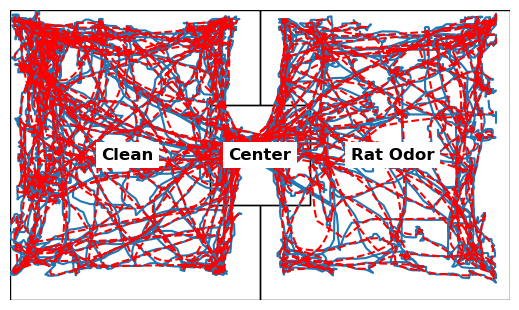

cohort_id  mouse_id  phase        containing_polygon
1          1_1       WithOdor     Rat Odor              26017
                                  Clean                 12577
                                  Center                 7212
                     WithoutOdor  Clean                 24016
                                  Rat Odor              19411
                                                        ...  
2          3_9       WithOdor     Clean                  4781
                                  Center                 1875
                     WithoutOdor  Rat Odor               6341
                                  Clean                  5448
                                  Center                 3405
Name: count, Length: 216, dtype: int64

In [81]:
arena_dict = load_arena_from_json(arena_dict_path)

processed_track_files = build_file_df(local_processed_track_dir, r".*cohort(?P<cohort_id>\d+)\\(?P<date_string>\d+)_mouse(?P<mouse_id>\S+)_(?P<phase>\w+)_processed\.csv")

full_track_dict = {}

for idx, row in tqdm(processed_track_files.iterrows(), total=len(processed_track_files)):
    track_df = pd.read_csv(row["file_path"], index_col=0)
    track_df = track_df.reindex(pd.RangeIndex(start=0, stop=track_df.index.max()+1, name="frame_index"))
    full_track_dict[(int(row["cohort_id"]), row["mouse_id"], row["phase"])] = track_df

full_track_df = pd.concat(full_track_dict, names=["cohort_id", "mouse_id", "phase", "frame_index"])

full_track_df["interpolated_x"] = full_track_df.groupby(["cohort_id", "mouse_id", "phase"])["clipped_x"].apply(lambda x: x.interpolate(method="linear", limit_area="inside").droplevel([0, 1, 2]))
full_track_df["interpolated_y"] = full_track_df.groupby(["cohort_id", "mouse_id", "phase"])["clipped_y"].apply(lambda x: x.interpolate(method="linear", limit_area="inside").droplevel([0, 1, 2]))
full_track_df["smoothed_x"] = full_track_df.groupby(["cohort_id", "mouse_id", "phase"])["interpolated_x"].rolling(window=11, center=True).mean().droplevel([0, 1, 2])
full_track_df["smoothed_y"] = full_track_df.groupby(["cohort_id", "mouse_id", "phase"])["interpolated_y"].rolling(window=11, center=True).mean().droplevel([0, 1, 2])

ax = plot_arena(arena_dict)
example_track = full_track_df.loc[(2, "1_1", "WithoutOdor")]
ax.plot(example_track["clipped_x"], example_track["clipped_y"])
ax.plot(example_track["smoothed_x"], example_track["smoothed_y"], color="red", ls="--")
plt.show()

track_data_df = full_track_df[["clipped_x", "clipped_y", "smoothed_x", "smoothed_y"]]
polygon_proportions = full_track_df.groupby(["cohort_id", "mouse_id", "phase"])["containing_polygon"].value_counts(normalize=False)
polygon_proportions = polygon_proportions.copy()
polygon_proportions

In [82]:
polygon_proportion_df = polygon_proportions.drop("Center", level=-1).unstack("containing_polygon")
polygon_proportion_df["clean_rat_ratio"] = polygon_proportion_df["Clean"] / polygon_proportion_df["Rat Odor"]

clean_preference_change = polygon_proportion_df["clean_rat_ratio"].unstack("phase")
clean_preference_change["preference_ratio"] = clean_preference_change["WithOdor"] / clean_preference_change["WithoutOdor"]
clean_preference_change["behavior_group"] = clean_preference_change["preference_ratio"].apply(lambda x: "avoiding" if x > 2 else ("preferring" if x < 0.5 else "no change"))
clean_preference_change = clean_preference_change.join(full_deanonymization_df)
clean_preference_change

WithOdor  WithoutOdor  preference_ratio behavior_group  \
cohort_id mouse_id                                                           
1         1_1       0.483415     1.237237          0.390721     preferring   
          1_2       0.783679     0.759847          1.031364      no change   
          1_3       0.650241     1.504054          0.432326     preferring   
          1_4       0.881087     0.757483          1.163177      no change   
          2_1       0.526478     0.952511          0.552727      no change   
          2_2       0.962604     0.524334          1.835861      no change   
          2_3       1.033268     0.780750          1.323430      no change   
          2_4       0.448884     0.576497          0.778641      no change   
          3_1       0.470217     1.045457          0.449772     preferring   
          3_2       0.739969     0.917694          0.806335      no change   
          3_3       0.449404     0.982383          0.457463     preferring   
          3_4       0.494972     0.988087          0.500940      no change   
2         1_1       1.166039     0.608917          1.914940      no change   
          1_10      1.008539     1.312072          0.768661      no change   
          1_11      0.766153     0.521678          1.468631      no change   
          1_12      0.474947     0.598786          0.793183      no change   
          1_2       1.050683     0.557224          1.885566      no change   
          1_3       1.438020     0.942022          1.526524      no change   
          1_4       0.777734     0.617473          1.259543      no change   
          1_5       0.728967     0.593619          1.228004      no change   
          1_6       0.728859     1.177846          0.618806      no change   
          1_7       0.594525     1.327416          0.447881     preferring   
          1_8       1.252874     1.021359          1.226674      no change   
          1_9       0.638437     0.798920          0.799125      no change   
          3_1       0.960306     1.042864          0.920835      no change   
          3_10      0.597897     1.005786          0.594457      no change   
          3_11      0.944802     0.629561          1.500732      no change   
          3_12      1.210202     1.114705          1.085670      no change   
          3_2       1.523956     0.718780          2.120199       avoiding   
          3_3       0.656453     0.956155          0.686555      no change   
          3_4       0.502168     0.733483          0.684634      no change   
          3_5       1.920980     0.977700          1.964796      no change   
          3_6       0.676463     1.007472          0.671446      no change   
          3_7       0.830418     0.898313          0.924419      no change   
          3_8       0.317444     1.051400          0.301924     preferring   
          3_9       0.558398     0.859170          0.649926      no change   

                   short_name         source  
cohort_id mouse_id                            
1         1_1            C1I1       Internal  
          1_2            C1I2       Internal  
          1_3            C1I3       Internal  
          1_4            C1I4       Internal  
          2_1            C1C1  Charles River  
          2_2            C1C2  Charles River  
          2_3            C1C3  Charles River  
          2_4            C1C4  Charles River  
          3_1            C1J1        Janvier  
          3_2            C1J2        Janvier  
          3_3            C1J3        Janvier  
          3_4            C1J4        Janvier  
2         1_1            C2J1        Janvier  
          1_10           C2J4        Janvier  
          1_11           C2I4       Internal  
          1_12           C2C4  Charles River  
          1_2            C2I1       Internal  
          1_3            C2C1  Charles River  
          1_4            C2J2        Janvier  
          1_5            C2I2       Internal  
          1_6        

In [83]:
cohort2_annotations_dir = annotations_dir / "rat_odor" / "cohort2"
cohort2_arena_dict_path = cohort2_annotations_dir / "arena_dict.json"
cohort2_arena_dict = load_arena_from_json(cohort2_arena_dict_path)

from shapely.ops import unary_union
cohort2_arena_bounds = unary_union(list(cohort2_arena_dict.values())).bounds
cohort2_xbounds = cohort2_arena_bounds[2]

In [84]:
extended_track_data_df = track_data_df.join(clean_preference_change["behavior_group"])
preferring_track_data_df = extended_track_data_df[extended_track_data_df["behavior_group"].eq("preferring")]

preferring_track_data_df.loc[2, "clipped_x"] = (preferring_track_data_df.loc[2, "clipped_x"] - cohort2_xbounds).abs().values
preferring_track_data_df.loc[2, "smoothed_x"] = (preferring_track_data_df.loc[2, "smoothed_x"] - cohort2_xbounds).abs().values

preferring_track_data_df

C:\Users\marti\AppData\Local\Temp\ipykernel_18172\1056035158.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  preferring_track_data_df.loc[2, "clipped_x"] = (preferring_track_data_df.loc[2, "clipped_x"] - cohort2_xbounds).abs().values
C:\Users\marti\AppData\Local\Temp\ipykernel_18172\1056035158.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  preferring_track_data_df.loc[2, "smoothed_x"] = (preferring_track_data_df.loc[2, "smoothed_x"] - cohort2_xbounds).abs().values


clipped_x   clipped_y  \
cohort_id mouse_id phase       frame_index                           
1         1_1      WithOdor    0            236.678569  135.501625   
                               1            236.380021  135.449374   
                               2            235.719333  135.197302   
                               3            234.606075  134.686224   
                               4            230.553084  134.428213   
...                                                ...         ...   
2         3_8      WithoutOdor 15531        456.373124   51.239401   
                               15532        453.715367   51.231740   
                               15533        453.277052   51.188669   
                               15534        452.774789   50.941261   
                               15535        450.152774   51.038695   

                                            smoothed_x  smoothed_y  \
cohort_id mouse_id phase       frame_index                           
1         1_1      WithOdor    0                   NaN         NaN   
                               1                   NaN         NaN   
                               2                   NaN         NaN   
                               3                   NaN         NaN   
                               4                   NaN         NaN   
...                                                ...         ...   
2         3_8      WithoutOdor 15531               NaN         NaN   
                               15532               NaN         NaN   
                               15533               NaN         NaN   
                               15534               NaN         NaN   
                               15535               NaN         NaN   

                                           behavior_group  
cohort_id mouse_id phase       frame_index                 
1         1_1      WithOdor    0               preferring  
                               1               preferring  
                               2               preferring  
                               3               preferring  
                               4               preferring  
...                                                   ...  
2         3_8      WithoutOdor 15531           preferring  
                               15532           preferring  
                               15533           preferring  
                               15534           preferring  
                               15535           preferring  

[440644 rows x 5 columns]

In [85]:
save_object(track_data_df, local_data_out_dir / "track_data_df.pkl", overwrite=True)
save_object(polygon_proportion_df, local_data_out_dir / "polygon_proportion_df.pkl", overwrite=True)
save_object(clean_preference_change, local_data_out_dir / "clean_preference_change.pkl", overwrite=True)
save_object(preferring_track_data_df, local_data_out_dir / "preferring_track_data_df.pkl", overwrite=True)

# Figure 7 (Rat Presence)

In [86]:
local_annotations_dir = annotations_dir / "rat_presence" / "cohort1"
arena_dict_path = local_annotations_dir / "arena_dict.json"
expanded_arena_transforms_path = local_annotations_dir / "expanded_arena_transforms.csv"
local_processed_track_dir = processed_track_dir / "rat_presence"
local_data_out_dir = data_out_dir / "rat_presence"
local_data_out_dir.mkdir(parents=True, exist_ok=True)

  0%|          | 0/72 [00:00<?, ?it/s]

100%|██████████| 72/72 [00:01<00:00, 70.25it/s]
C:\Users\marti\AppData\Local\Temp\ipykernel_18172\1802154512.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  example_track = full_track_df.loc[(2, "1_1", "WithoutRat")]


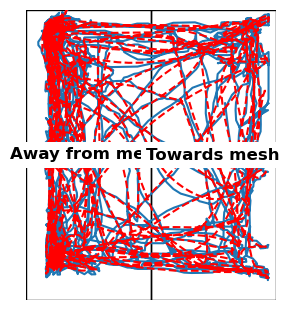

cohort_id  mouse_id  phase       containing_polygon
1          1_1       WithRat     Away from mesh        15973
                                 Towards mesh           6243
                     WithoutRat  Towards mesh          13089
                                 Away from mesh        10290
           1_2       WithRat     Away from mesh        13698
                                                       ...  
2          3_8       WithoutRat  Away from mesh         2769
           3_9       WithRat     Towards mesh           7188
                                 Away from mesh          583
                     WithoutRat  Towards mesh           5768
                                 Away from mesh         1887
Name: count, Length: 144, dtype: int64

In [102]:
arena_dict = load_arena_from_json(arena_dict_path)

processed_track_files = build_file_df(local_processed_track_dir, r".*cohort(?P<cohort_id>\d+)\\(?P<date_string>\d+)_mouse(?P<mouse_id>\S+)_(?P<phase>\w+)_processed\.csv")

full_track_dict = {}

for idx, row in tqdm(processed_track_files.iterrows(), total=len(processed_track_files)):
    track_df = pd.read_csv(row["file_path"], index_col=0)
    track_df = track_df.reindex(pd.RangeIndex(start=0, stop=track_df.index.max()+1, name="frame_index"))
    full_track_dict[(int(row["cohort_id"]), row["mouse_id"], row["phase"])] = track_df

full_track_df = pd.concat(full_track_dict, names=["cohort_id", "mouse_id", "phase", "frame_index"])

full_track_df["interpolated_x"] = full_track_df.groupby(["cohort_id", "mouse_id", "phase"])["clipped_x"].apply(lambda x: x.interpolate(method="linear", limit_area="inside").droplevel([0, 1, 2]))
full_track_df["interpolated_y"] = full_track_df.groupby(["cohort_id", "mouse_id", "phase"])["clipped_y"].apply(lambda x: x.interpolate(method="linear", limit_area="inside").droplevel([0, 1, 2]))
full_track_df["smoothed_x"] = full_track_df.groupby(["cohort_id", "mouse_id", "phase"])["interpolated_x"].rolling(window=11, center=True).mean().droplevel([0, 1, 2])
full_track_df["smoothed_y"] = full_track_df.groupby(["cohort_id", "mouse_id", "phase"])["interpolated_y"].rolling(window=11, center=True).mean().droplevel([0, 1, 2])

ax = plot_arena(arena_dict)
example_track = full_track_df.loc[(2, "1_1", "WithoutRat")]
ax.plot(example_track["clipped_x"], example_track["clipped_y"])
ax.plot(example_track["smoothed_x"], example_track["smoothed_y"], color="red", ls="--")
plt.show()

track_data_df = full_track_df[["clipped_x", "clipped_y", "smoothed_x", "smoothed_y"]]
polygon_proportion_df = full_track_df.groupby(["cohort_id", "mouse_id", "phase"])["containing_polygon"].value_counts(normalize=False)
polygon_proportion_df

In [103]:
polygon_proportion_df = polygon_proportion_df.unstack("containing_polygon")
polygon_proportion_df["mesh_avoidance_ratio"] = polygon_proportion_df["Away from mesh"] / polygon_proportion_df["Towards mesh"]

mesh_avoidance_change = polygon_proportion_df["mesh_avoidance_ratio"].unstack("phase")
mesh_avoidance_change["avoidance_ratio"] = mesh_avoidance_change["WithRat"] / mesh_avoidance_change["WithoutRat"]
mesh_avoidance_change["behavior_group"] = mesh_avoidance_change["avoidance_ratio"].apply(lambda x: "avoiding" if x > 2 else ("preferring" if x < 0.5 else "no change"))
mesh_avoidance_change = mesh_avoidance_change.join(full_deanonymization_df)
mesh_avoidance_change

WithRat  WithoutRat  avoidance_ratio behavior_group  \
cohort_id mouse_id                                                         
1         1_1       2.558546    0.786156         3.254500       avoiding   
          1_2       1.709046    0.779967         2.191178       avoiding   
          1_3       3.454154    0.290218        11.901917       avoiding   
          1_4       0.310994    0.784639         0.396353     preferring   
          2_1       0.493535    0.901130         0.547685      no change   
          2_2       0.767955    0.859339         0.893658      no change   
          2_3       0.956948    0.420772         2.274270       avoiding   
          2_4       1.103021    0.594039         1.856815      no change   
          3_1       3.290634    0.876676         3.753535       avoiding   
          3_2       1.373764    0.739455         1.857807      no change   
          3_3       0.356628    0.405856         0.878705      no change   
          3_4       0.609809    0.439378         1.387892      no change   
2         1_1       1.070327    0.326482         3.278369       avoiding   
          1_10      0.126860    0.390166         0.325145     preferring   
          1_11      0.632347    0.618614         1.022200      no change   
          1_12      0.193987    0.161645         1.200078      no change   
          1_2       1.472959    0.212281         6.938734       avoiding   
          1_3       1.588776    0.405712         3.916016       avoiding   
          1_4       1.212470    1.273792         0.951859      no change   
          1_5       1.648908    0.368973         4.468906       avoiding   
          1_6       0.586983    0.618602         0.948887      no change   
          1_7       0.531854    0.309623         1.717750      no change   
          1_8       3.270437    0.889737         3.675736       avoiding   
          1_9       0.681751    0.232875         2.927544       avoiding   
          3_1       0.267585    0.216643         1.235142      no change   
          3_10      3.070718    0.277823        11.052772       avoiding   
          3_11      0.599958    0.130579         4.594602       avoiding   
          3_12      1.660925    0.519171         3.199186       avoiding   
          3_2       0.548630    0.313272         1.751293      no change   
          3_3       1.268005    0.242653         5.225586       avoiding   
          3_4       0.384049    0.495568         0.774966      no change   
          3_5       1.375696    0.296579         4.638554       avoiding   
          3_6       1.723001    0.394492         4.367645       avoiding   
          3_7       1.148907    0.311595         3.687177       avoiding   
          3_8       0.525825    0.570222         0.922141      no change   
          3_9       0.081107    0.327150         0.247921     preferring   

                   short_name         source  
cohort_id mouse_id                            
1         1_1            C1I1       Internal  
          1_2            C1I2       Internal  
          1_3            C1I3       Internal  
          1_4            C1I4       Internal  
          2_1            C1C1  Charles River  
          2_2            C1C2  Charles River  
          2_3            C1C3  Charles River  
          2_4            C1C4  Charles River  
          3_1            C1J1        Janvier  
          3_2            C1J2        Janvier  
          3_3            C1J3        Janvier  
          3_4            C1J4        Janvier  
2         1_1            C2J1        Janvier  
          1_10           C2J4        Janvier  
          1_11           C2I4       Internal  
          1_12           C2C4  Charles River  
          1_2            C2I1       Internal  
          1_3            C2C1  Charles River  
          1_4            C2J2        Janvier  
          1_5            C2I2       Internal  
          1_6            C2C2  Charles River  
          1_7            C2J3        Janvier  
    

In [113]:
cohort2_annotations_dir = annotations_dir / "rat_presence" / "cohort2"
cohort2_arena_dict_path = cohort2_annotations_dir / "arena_dict.json"
cohort2_arena_dict = load_arena_from_json(cohort2_arena_dict_path)

from shapely.ops import unary_union
cohort2_arena_bounds = unary_union(list(cohort2_arena_dict.values())).bounds
cohort2_xbounds = cohort2_arena_bounds[2]

In [115]:
extended_track_data_df = track_data_df.join(mesh_avoidance_change["behavior_group"])
avoiding_track_data_df = extended_track_data_df[extended_track_data_df["behavior_group"].eq("avoiding")]

avoiding_track_data_df.loc[2, "clipped_x"] = (avoiding_track_data_df.loc[2, "clipped_x"] - cohort2_xbounds).abs().values
avoiding_track_data_df.loc[2, "smoothed_x"] = (avoiding_track_data_df.loc[2, "smoothed_x"] - cohort2_xbounds).abs().values

avoiding_track_data_df

C:\Users\marti\AppData\Local\Temp\ipykernel_18172\72671838.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  avoiding_track_data_df.loc[2, "clipped_x"] = (avoiding_track_data_df.loc[2, "clipped_x"] - cohort2_xbounds).abs().values
C:\Users\marti\AppData\Local\Temp\ipykernel_18172\72671838.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  avoiding_track_data_df.loc[2, "smoothed_x"] = (avoiding_track_data_df.loc[2, "smoothed_x"] - cohort2_xbounds).abs().values


clipped_x  clipped_y  smoothed_x  \
cohort_id mouse_id phase      frame_index                                      
1         1_1      WithoutRat 0             43.266804  19.544467         NaN   
                              1             43.429358  19.345236         NaN   
                              2             43.895123  19.372706         NaN   
                              3             44.032839  19.368142         NaN   
                              4             44.077547  19.254575         NaN   
...                                               ...        ...         ...   
2         3_7      WithRat    8570         212.230777  21.435721         NaN   
                              8571         212.708070  21.279747         NaN   
                              8572         212.580404  21.021791         NaN   
                              8573         212.636157  20.717768         NaN   
                              8574         243.000000  98.001262         NaN   

                                           smoothed_y behavior_group  
cohort_id mouse_id phase      frame_index                             
1         1_1      WithoutRat 0                   NaN       avoiding  
                              1                   NaN       avoiding  
                              2                   NaN       avoiding  
                              3                   NaN       avoiding  
                              4                   NaN       avoiding  
...                                               ...            ...  
2         3_7      WithRat    8570                NaN       avoiding  
                              8571                NaN       avoiding  
                              8572                NaN       avoiding  
                              8573                NaN       avoiding  
                              8574                NaN       avoiding  

[438135 rows x 5 columns]

In [116]:
save_object(track_data_df, local_data_out_dir / "track_data_df.pkl", overwrite=True)
save_object(polygon_proportion_df, local_data_out_dir / "polygon_proportion_df.pkl", overwrite=True)
save_object(mesh_avoidance_change, local_data_out_dir / "mesh_avoidance_change.pkl", overwrite=True)
save_object(avoiding_track_data_df, local_data_out_dir / "avoiding_track_data_df.pkl", overwrite=True)